## <font color='darkblue'>Tensor</font>
<b><a href='https://pytorch.org/docs/stable/tensors.html'>Tensor</a></b> 是 PyTorch 中重要的資料結構, 可被視為是一個高維陣列. 它可以是一個數 (純量), 一維陣列 (向量), 二維陣列 (矩陣) 或更高維陣列. Tensor 和 numpy 的 ndarrays 類似, 但 Tensor 可以使用 GPU 加速. Tensor 的使用和 numpy 及 MATLAB 的介面十分相似, 透過下面幾個範例可以了解 Tensor 的基本使用方法:

In [1]:
import torch as t

x1 = t.Tensor(5, 3)  # 建構 5x3 矩陣, 只分配空間並未初始化
print('x1:\n{}\n'.format(x1))

x2 = t.zeros(5, 3, dtype=t.double) # 建構 5x3 矩陣, 並初始化為 0
print('x2:\n{}\n'.format(x2))

x3 = t.Tensor([[1,2,3],[4,5,6],[7,8,9]])  # 直接從資料建構 3x3 矩陣
print('x3:\n{}\n'.format(x3))

# create a tensor based on an existing tensor. 
# These methods will reuse properties of the input tensor, e.g. dtype, unless new values are provided by user
x4 = x2.new_ones(5, 3)
print('x4:\n{}\n'.format(x4))

x5 = t.randn_like(x4, dtype=t.float)    # override dtype!
print('x5:\n{}\n'.format(x5))

x1:
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.8833e-42, 0.0000e+00],
        [0.0000e+00, 4.7428e+30, 0.0000e+00]])

x2:
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

x3:
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

x4:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

x5:
tensor([[-1.0995,  0.0781, -0.3726],
        [-0.6765, -0.4470, -0.8601],
        [ 2.6661, -0.2692,  0.0614],
        [ 0.1526, -0.9156,  0.8812],
        [ 0.4252, -1.6937,  0.2502]])



In [2]:
# 使用 [0,1] 均勻分布隨機初始化 x 陣列
x = t.rand(5, 3)
x

tensor([[0.0768, 0.3231, 0.6631],
        [0.2417, 0.9487, 0.1596],
        [0.5142, 0.7312, 0.8054],
        [0.3748, 0.5793, 0.9556],
        [0.2079, 0.8428, 0.8458]])

In [3]:
# 查看 x 的維度
print(x.size())

# 兩種存取 x 的 column 數目
print("x.column = {} or {}".format(x.size()[1], x.size(1)))

torch.Size([5, 3])
x.column = 3 or 3


torch.Size 是 tuple 物件的子類別, 它支援 tuple 的所有操作.

In [4]:
print("x.Size is tupel? {}".format(isinstance(x.size(), tuple)))

x.Size is tupel? True


接著來看 tensor 的幾種簡單數學操作.

In [5]:
y = t.rand(5, 3)
print("y:\n{}".format(y))

# 加法的第一種寫法
x + y 

y:
tensor([[0.6672, 0.9821, 0.2827],
        [0.6092, 0.0570, 0.6994],
        [0.3399, 0.8250, 0.9235],
        [0.3306, 0.3987, 0.6042],
        [0.9472, 0.0945, 0.7959]])


tensor([[0.7440, 1.3052, 0.9458],
        [0.8508, 1.0057, 0.8590],
        [0.8541, 1.5563, 1.7289],
        [0.7055, 0.9780, 1.5598],
        [1.1551, 0.9373, 1.6417]])

In [6]:
# 加法的第二種寫法
t.add(x, y)

tensor([[0.7440, 1.3052, 0.9458],
        [0.8508, 1.0057, 0.8590],
        [0.8541, 1.5563, 1.7289],
        [0.7055, 0.9780, 1.5598],
        [1.1551, 0.9373, 1.6417]])

In [7]:
# 加法的第三種寫法: 指定結果的輸出目標為 result
result = t.Tensor(5, 3)  # 分配空間
t.add(x, y, out=result)  # 輸出到 result
result

tensor([[0.7440, 1.3052, 0.9458],
        [0.8508, 1.0057, 0.8590],
        [0.8541, 1.5563, 1.7289],
        [0.7055, 0.9780, 1.5598],
        [1.1551, 0.9373, 1.6417]])

In [8]:
print("Original y:\n{}\n".format(y))

# 第一種加法不改變 y 的內容
y.add(x)  # 普通加法, 不改變 y 內容
print("y.add(x) got y:\n{}\n".format(y))

# 第二種加法會改變 y 的內容
y.add_(x)  # inplace 加法, 改變 y 內容
print("y.add_(x) got y:\n{}\n".format(y))

Original y:
tensor([[0.6672, 0.9821, 0.2827],
        [0.6092, 0.0570, 0.6994],
        [0.3399, 0.8250, 0.9235],
        [0.3306, 0.3987, 0.6042],
        [0.9472, 0.0945, 0.7959]])

y.add(x) got y:
tensor([[0.6672, 0.9821, 0.2827],
        [0.6092, 0.0570, 0.6994],
        [0.3399, 0.8250, 0.9235],
        [0.3306, 0.3987, 0.6042],
        [0.9472, 0.0945, 0.7959]])

y.add_(x) got y:
tensor([[0.7440, 1.3052, 0.9458],
        [0.8508, 1.0057, 0.8590],
        [0.8541, 1.5563, 1.7289],
        [0.7055, 0.9780, 1.5598],
        [1.1551, 0.9373, 1.6417]])



<b><font color='darkred'>注意:</font></b> 函數名稱後面帶底線的操作會修改 Tensor 本身.

Tensor 的選取操作與 numpy 類別相似:

In [9]:
x[:, 1] # 選取每列的第二攔

tensor([0.3231, 0.9487, 0.7312, 0.5793, 0.8428])

Tensor 還支援很多操作, 包含數學運算, 線性代數, 選擇與切片, 其介面設計與 numpy 極為相似. 更詳細的使用方法會在第三章說明. Tensor 和 numpy 的陣列間的互動操作非常容易且快速. Tensor 不支援的操作可以先轉為 numpy 陣列處理, 之後再轉回 Tensor:

In [10]:
a = t.ones(5)  # 新建長度為 5 並初始值為 1
a

tensor([1., 1., 1., 1., 1.])

In [11]:
b = a.numpy() # Tensor -> Numpy
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [12]:
import numpy as np

a = np.ones(5)
b = t.from_numpy(a)  #  Numpy -> Tensor
print("a:\n{}\nb:\n{}\n".format(a, b))

a:
[1. 1. 1. 1. 1.]
b:
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)



Tensor 和 numpy 物件共用記憶體, 所以他們之間的轉換很快, 而且幾乎不會耗損資源. 這也表示如果其中一個變了, 另一個也會隨之改變:

In [13]:
b.add_(1)  # 以 _ 結尾的函數是 inplace 操作
print("a:\n{}\nb:\n{}\n".format(a, b))

a:
[2. 2. 2. 2. 2.]
b:
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)



Tensor 可透過 .cuda 方法轉為 GPU 的 Tensor, 進一步享受 GPU 帶來的加速運算:

In [14]:
# 在不支持 cuda 的機器上, 下一步不會運行
if t.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    z = x + y
    print('z:\n{}'.format(z))

z:
tensor([[0.8208, 1.6284, 1.6090],
        [1.0925, 1.9543, 1.0186],
        [1.3683, 2.2875, 2.5343],
        [1.0803, 1.5573, 2.5154],
        [1.3631, 1.7800, 2.4875]], device='cuda:0')


在此處可能會發現 GPU 運算對於速度並未提升太多, 這是因為 x 和 y 相加所需運算量太少, 而且將資料從記憶體傳輸到顯示卡記憶體也需要額外的成本. GPU 的優勢需在大規模資料和複雜運算下才能表現出來.

## <font color='darkblue'>Autograd: 自動微分</font>
深度學習的演算法本質上是透過反向傳播求倒數, PyTorch 的 <b><a href='https://pytorch.org/docs/stable/autograd.html#'>Autograd</a></b> 模組實現此功能. 在 Tensor 上的所有操作, Autograd 都能為它們自動提供微分, 避免手動計算導數的複雜過程. <b><a href='https://pytorch.org/docs/stable/autograd.html#variable-deprecated'>autograd.Variable</a></b> 是 Autograd 中的核心類別, 它簡單封裝了 Tensor, 並支援幾乎所有 Tensor 的操作. Tensor 在被封裝為 Variable 之後, 可以呼叫它的 <font color='blue'>.backward</font> 實現反向傳播

In [15]:
from torch.autograd import Variable

# 使用 Tensor 新建一個 Variable
x = t.ones(2, 2, requires_grad = True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [16]:
y = x.sum()
y

tensor(4., grad_fn=<SumBackward0>)

In [17]:
y.grad_fn

In [18]:
y.backward()  # 反向傳播, 計算梯度

# y = x.sum() = (x[0][0] + x[0][1] + x[1][0] + x[1][1])
# 每個值的梯度都為 1
x.grad

tensor([[1., 1.],
        [1., 1.]])

<b><font color='darkred'>注意:</font></b> <i>grad</i> 在反向傳播過程中是累加的 (accumulated), 這表示每次執行反向傳播, 梯度都會累加之前的梯度, 所以反向傳播之前須把梯度歸零.

In [19]:
y.backward()
x.grad

tensor([[2., 2.],
        [2., 2.]])

In [20]:
# 以下操作是 inplace 
x.grad.data.zero_()

tensor([[0., 0.],
        [0., 0.]])

In [21]:
y.backward() 
x.grad

tensor([[1., 1.],
        [1., 1.]])

## <font color='darkblue'>神經網路</font>
Autograd 實現了反向傳播功能, 但是直接用來寫深度學習的程式在很多情況下還是稍顯複雜, <b><a href='https://pytorch.org/docs/stable/nn.html'>torch.nn</a></b> 是專門為神經網路設計的模組化介面. nn 建置於 Autograd 之上, 可用來定義和執行神經網路. <b><a href='https://pytorch.org/docs/stable/nn.html#module'>nn.Module</a></b> 是 nn 中最重要的類別, 可以把它看作一個網路的封裝, 包含網路各層定義與 forward 方法, 呼叫 forward(input) 方法, 可傳回正向傳播的結果. 我們以最早的旋積神經網路 <a href='https://en.wikipedia.org/wiki/Convolutional_neural_network'>LeNet</a> 為例, 蘭看看如何用 <b><a href='https://pytorch.org/docs/stable/nn.html#module'>nn.Module</a></b> 實現. LeNet 的網路結構如下圖所示:
![圖 2-7 LeNet 網路結構](images/F2-7.png)
(Image source=https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4)

這是一個基礎的正向傳播 (feed-forward) 網路: 接收輸入, 經過層層傳遞運算得到輸出.

### <font color='darkgreen'>定義網路</font>
定義網路時, 需要繼承 <b><a href='https://pytorch.org/docs/stable/nn.html#module'>nn.Module</a></b> 並實現它的 forward 方法, 把網路中具有可學習參數的層放在建置函數 <font color='blue'>__init__</font> 中. 如果某一層 (如 ReLU) 不具有可學習的參數, 則既可放在建置函數中, 也可以不放, 但這裡不建議放在其中, 而在 forward 中使用 <b><a href='https://pytorch.org/docs/stable/nn.html#torch-nn-functional'>nn.functional</a></b> 代替.

In [22]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        # nn.Module 子類別的函數必須在構造函數中執行父類別的構造函數
        # 下式等值於 nn.Module.__init__(self)
        super(Net, self).__init__()
        
        # 旋積層 '1' 表示輸入圖片為單通道, '6' 表示輸出通道, '5' 表示旋積核心為 5x5
        self.conv1 = nn.Conv2d(1, 6, 5)
        
        # 旋積層
        self.conv2 = nn.Conv2d(6, 16, 5)

        # 訪設層/全連接層: y = Wx + b
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # 旋積 -> 啟動 -> 池化
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        
        # reshape, '-1' means 自適應
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


只要在 nn.Module 的子類別中定義了 forward 函數, backward 函數就會被自動實現 (利用 Autograd). 在 forward 函數中可使用任何 Variable 支援的函數, 還可以使用 if/else 循環, print, log 等 Python 語法, 寫法和標準的 Python 寫法一致. 網路的可學習參數透過 net.parameters() 傳回, net.named_parameters 可同時傳回可學習參數及名稱.

In [23]:
params = list(net.parameters())
print(len(params))

10


In [24]:
for name, parameters in net.named_parameters():
    print("{name}: {size}".format(name=name, size=parameters.size()))

conv1.weight: torch.Size([6, 1, 5, 5])
conv1.bias: torch.Size([6])
conv2.weight: torch.Size([16, 6, 5, 5])
conv2.bias: torch.Size([16])
fc1.weight: torch.Size([120, 400])
fc1.bias: torch.Size([120])
fc2.weight: torch.Size([84, 120])
fc2.bias: torch.Size([84])
fc3.weight: torch.Size([10, 84])
fc3.bias: torch.Size([10])


forward 函數的輸入與輸出都是 Variable, 只有 Variable 才具有自動求導功能, Tensor 是沒有的, 所以在輸入時, 需要把 Tensor 封裝成 Varialbe:
* <b><a href='https://pytorch.org/docs/stable/torch.html#torch.randn'>torch.randn</a></b>: Returns a tensor filled with random numbers from a normal distribution with mean 0 and variance 1 (also called the standard normal distribution).

In [25]:
inputs = Variable(t.randn(1, 1, 32, 32))
print("inputs({}):\n{}".format(inputs.shape, inputs))
outs = net(inputs)
print("outs({}):\n{}".format(outs.shape, outs))

inputs(torch.Size([1, 1, 32, 32])):
tensor([[[[-0.6691,  0.7823,  0.9814,  ...,  1.6084,  2.2952,  0.1237],
          [-1.5178, -0.1168, -0.3910,  ..., -0.2114,  0.5508, -0.3700],
          [-0.1387,  0.8553, -0.7290,  ..., -1.0950,  0.4704, -0.5796],
          ...,
          [-0.9031, -0.2470,  1.7085,  ...,  0.0351, -1.7495, -0.2193],
          [-1.3025, -0.1806,  1.2750,  ..., -1.6698, -0.0585,  0.4784],
          [ 2.6715,  1.5011,  1.3606,  ...,  1.8064, -0.3572, -0.5274]]]])
outs(torch.Size([1, 10])):
tensor([[-0.0904, -0.0365, -0.0136,  0.0302,  0.0792, -0.0684, -0.0201,  0.1131,
         -0.0998, -0.0569]], grad_fn=<AddmmBackward>)


In [26]:
net.zero_grad()  # 所有參數的梯度清除為零
print("t.ones(1, 10):\n{}".format(t.ones(1, 10)))
outs.backward(Variable(t.ones(1, 10)))  # 反向傳播

t.ones(1, 10):
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


需要注意的是, <b><a href='https://pytorch.org/docs/stable/nn.html'>torch.nn</a></b> 只支援 mini-batches, 不支援一次只輸入一個樣本, 及一次必須是一個 batch. 如果只想輸入一個樣本, 則用 inputs.unsqueeze(0) 將 batch_size 設為 1. 舉例來說, nn.Conv2d 輸入必須是四維的, 形如 <font color='blue'>nSamples x nChannels x Height x Width</font>. 可將 nSamples 設為 1, 及 <font color='blue'>1 x nChannels x Height x Width</font>.

### <font color='darkgreen'>損失函數 </font>
nn 實現了神經網路中大多數的損失函數, 例如 <a href='https://pytorch.org/docs/stable/nn.html#torch.nn.MSELoss'>nn.MSELoss</a> 用來計算 <b><a href='https://en.wikipedia.org/wiki/Mean_squared_error'>均方誤差</a></b>, <a href='https://pytorch.org/docs/stable/nn.html#torch.nn.CrossEntropyLoss'>nn.CrossEntropyLoss</a> 用來計算 <b><a href='https://en.wikipedia.org/wiki/Cross_entropy'>交換熵損失</a></b>.

In [27]:
outputs = net(inputs)
target = Variable(t.arange(0, 10, dtype=t.float))
print("target={}".format(target))
criterion = nn.MSELoss()
loss = criterion(outputs, target)
loss

target=tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])


tensor(28.6323, grad_fn=<MseLossBackward>)

如果對 <i>loss</i> 進行反向傳播溯源 (使用 grd_fn 屬性), 可以看到它的計算圖如下:

當呼叫 loss.background() 時, 該圖會動態產生並自動微分, 也會自動計算圖中參數的導數.

In [28]:
# 運行 .backward, 觀察呼叫之前和呼叫之後的 grad
net.zero_grad()  # 把之前 net 中所有可學習參數的梯度歸零
print("Before 反向傳播之前 conv1.bias 的梯度:")
print(net.conv1.bias.grad)
loss.backward()
print("Before 反向傳播之後 conv1.bias 的梯度:")
print(net.conv1.bias.grad)

Before 反向傳播之前 conv1.bias 的梯度:
tensor([0., 0., 0., 0., 0., 0.])
Before 反向傳播之後 conv1.bias 的梯度:
tensor([ 0.0986, -0.0321,  0.0026,  0.0501, -0.0223, -0.0178])


### <font color='darkgreen'>最佳化器</font>
在反向傳播計算完所有參數的梯度後, 還需要使用最佳化方法更新網路的加權和參數. 舉例來說, <b><a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent'>隨機梯度下降法</a></b> (SGD) 的更新策略如下:<br/>
weight = weight - learning_rate * gradient<br/>
<br/>
手動實現如下:

In [29]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)  # inplace 減法

<b><a href='https://pytorch.org/docs/stable/optim.html'>torch.optim</a></b> 中實現了深度學習中絕大多數的最佳方法, 例如 RMSProp, Adam, SGD 等, 更便於使用, 因此通常並不需要手動實作它們.

In [30]:
import torch.optim as optim

# 新建一個優化器, 指定要調整的參數和學習率
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 在訓練過程中, 先將梯度歸零 
optimizer.zero_grad()

# 計算損失
outputs = net(inputs)
loss = criterion(outputs, target)

# 反向傳播
loss.backward()

# 更新參數
optimizer.step()

### <font color='darkgreen'>資料載入與前置處理</font>
在深度學習中資料載入及前置處理是非常複雜繁瑣的, 但 PyTorch 提供了一些可極大化簡化和加快資料處理流程的工具. 同時常用的資料集, PyTorch 也提供了封裝好的API 提供使用者快速呼叫, 這些資料集住要儲存在 torchversion 中.

torchversion 實現了常用的圖像資料載入功能, 例如 Imagenet, CIFAR10, MNIST 等, 以及常用的資料轉換操作, 這相當大地方便資料載入.

## <font color='darkblue'>小試牛刀: CIFAR-10 分類 </font>
下面我們來嘗試實現對 <b><a href='https://en.wikipedia.org/wiki/CIFAR-10'>CIFAR-10</a></b> 資料集的分類, 步驟如下:
1. 使用 torchversion 載入並前置處理 CIFAR-10 資料集
2. 定義網路
3. 定義損失函數與最佳化器
4. 訓練網路並更新網路參數
5. 測試網路

### <font color='darkgreen'>CIFAR-10 資料載入及前置處理</font>
CIFAR-10 是一個常用的彩色圖片資料集, 它有十個類別 airplane, automobile, bird, cat, deer, dog, frog, horse, ship 和 trunk. 每個圖片都是 3 x 32 x 32, 即 3 通道彩色圖片, 解析度為 32 x 32

In [83]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage

show = ToPILImage() # 把 Tensor 轉成 Image 以方便可視化

# 第一次運行程式 torchversion 會自動下載 CIFAR-10 資料集
# 大約 100 MB, 需花費一點時間.
# 如果已經曾經下載 CIFAR-10, 可通過 root 參數指定路徑

# 定義對資料的預處理
# https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Normalize
transform = transforms.Compose([
    transforms.ToTensor(),  # 轉成 Tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 訓練集
trainset = tv.datasets.CIFAR10(
    root='C:\\tmp\\pytorch_data',
    train=True,
    download=True,
    transform=transform
)

trainloader = t.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

Files already downloaded and verified


In [84]:
# 測試集
testset = tv.datasets.CIFAR10(
    root='C:\\tmp\\pytorch_data',
    train=False,
    download=True,
    transform=transform
)

testloader = t.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle=False,
    num_workers=2
)

Files already downloaded and verified


Dataset 物件是一個資料集, 可以按索引存取, 傳回 tuple(data, label) 的資料格式:

trainset=<class 'torchvision.datasets.cifar.CIFAR10'>
trainset[30] is plane:


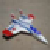

In [85]:
print("trainset={}".format(trainset.__class__))
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

row = 30
(data, label) = trainset[row]

# (data + 1) / 2 是為了還原被 Normalized 的資料
print("trainset[{}] is {}:".format(row, classes[label]))
show((data+1)/2).resize((50, 50))

Dataloader 是一個可替換的物件, 它將 dataset 傳回的每一筆資料樣本連接成一個 batch, 並提供多執行緒加速最佳化和資料 shuffle 等操作. 當程式對 dataset 的所有資料檢查完一遍後, 對 Dataloader 也完成了一次循環.

horse        cat          deer         cat         


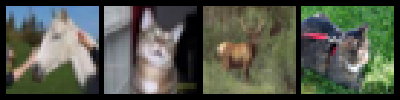

In [86]:
dataiter = iter(trainloader)
images, labels = dataiter.next() # 返回四張圖片及標籤
print(' '.join(list(map(lambda label: "{:12s}".format(classes[label]), labels))))
show(tv.utils.make_grid((images+1)/2)).resize((400, 100))

### <font color='darkgreen'>定義網路</font>
複製上面的 LeNet 網路, 修改 <font color='blue'>self.conv1</font> 中第一個參數為 3 通道, 因為 <b><a href='https://en.wikipedia.org/wiki/CIFAR-10'>CIFAR-10</a></b> 是 3 通道彩圖.

In [87]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        # nn.Module 子類別的函數必須在構造函數中執行父類別的構造函數
        # 下式等值於 nn.Module.__init__(self)
        super(Net, self).__init__()
        
        # 旋積層 '3' 表示輸入圖片為 3彩通道, '6' 表示輸出通道, '5' 表示旋積核心為 5x5
        self.conv1 = nn.Conv2d(3, 6, 5)
        
        # 旋積層
        self.conv2 = nn.Conv2d(6, 16, 5)

        # 訪設層/全連接層: y = Wx + b
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # 旋積 -> 啟動 -> 池化
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        
        # reshape, '-1' means 自適應
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### <font color='darkgreen'>定義損失函數和最佳化器</font>


In [88]:
from torch import optim

# https://en.wikipedia.org/wiki/Cross_entropy
criterion = nn.CrossEntropyLoss() 

# https://pytorch.org/docs/master/optim.html
# https://pytorch.org/docs/stable/optim.html#torch.optim.SGD
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### <font color='darkgreen'>訓練網路</font>
所有網路的訓練流程都是類似的, 不斷地執行以下流程:
* 輸入資料
* 正向傳播 + 反向傳播
* 更新參數

In [89]:
from datetime import datetime

st = datetime.now()
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 輸入資料
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        # 初始梯度
        optimizer.zero_grad()
        
        # forward + backward
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        # 更新參數
        optimizer.step()
        
        # 列印 log 信息
        running_loss += loss.data
        if (i+1) % 2000 == 0:  # 每 2000 個 batch 列印一次訓練狀態
            print("[{:,d}, {:5,d}] loss: {:.03f}".format(epoch + 1, i + 1, running_loss / 2000))
            
            running_loss = 0.0
            
print("Finished Training! ({})".format(datetime.now() - st))

[1, 2,000] loss: 2.182
[1, 4,000] loss: 1.869
[1, 6,000] loss: 1.696
[1, 8,000] loss: 1.606
[1, 10,000] loss: 1.550
[1, 12,000] loss: 1.485
[2, 2,000] loss: 1.425
[2, 4,000] loss: 1.371
[2, 6,000] loss: 1.378
[2, 8,000] loss: 1.356
[2, 10,000] loss: 1.325
[2, 12,000] loss: 1.308
Finished Training! (0:01:57.406897)


此處僅訓練了 2 個 epoch (檢查完一遍資料集稱為一個 epoch), 我們來看看訓練過後的網路的效果. 接著我們將測試圖片輸入網路並計算出它的 label, 然後與實際的 label 進行比較.

Real Label:
cat          ship         ship         plane       



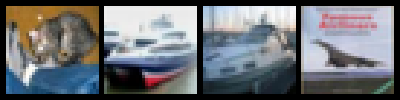

In [90]:
dataiter = iter(testloader)
images, labels = dataiter.next() # 一個 batch 返回 4 張圖片

print("Real Label:\n{}\n".format(' '.join(list(map(lambda label: "{:12s}".format(classes[label]), labels)))))
show(tv.utils.make_grid((images+1)/2)).resize((400, 100))

接著計算網路預測的 label:

In [91]:
# 計算圖片在每個類別上的分數
outputs = net(Variable(images))

# 取出得分最高的類別
# https://pytorch.org/docs/stable/torch.html#torch.max
score_tensor, label_tensor = t.max(outputs.data, 1)
print("Prediction:\n{}\n".format(' '.join(list(map(lambda label: "{:12s}".format(classes[label]), labels)))))

Prediction:
cat          ship         ship         plane       



上面只是其中一個 batch 的結果, 我們來看看在整個測試集上的效果:

In [92]:
correct = 0 # 預測正確的圖片數
total = 0  # 總共的圖片數

for data in testloader:
    # labels.size=torch.Size([4])
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = t.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print("{} 張測試視集中的準確率為: {:.02f}%".format(total, 100 * correct / total))

10000 張測試視集中的準確率為: 52.00%


### <font color='darkgreen'>在 GPU 上訓練</font>
就像之前把 Tensor 從 CPU 轉到 GPU 一樣, 模型也可以類似地從 CPU 轉到 GPU:

In [61]:
if t.cuda.is_available():
    print("Using GPU")
    net.cuda()
    images = images.cuda()
    labels = labels.cuda()
    output = net(Variable(images))
    loss = criterion(output, Variable(labels))

Using GPU


In [82]:
from datetime import datetime

if t.cuda.is_available():
    print("Using GPU")
    net.cuda()    
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)    
    #optimizer = optim.Adam(net.parameters(), lr=0.01)    
    

st = datetime.now()
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 輸入資料
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        if t.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()
        
        # 初始梯度
        optimizer.zero_grad()
        
        # forward + backward
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        # 更新參數
        optimizer.step()
        
        # 列印 log 信息
        running_loss += loss.data
        if (i+1) % 2000 == 0:  # 每 2000 個 batch 列印一次訓練狀態
            print("[{:,d}, {:5,d}] loss: {:.03f}".format(epoch + 1, i + 1, running_loss / 2000))
            
            running_loss = 0.0
            
print("Finished Training! ({})".format(datetime.now() - st))

Using GPU
[1, 2,000] loss: 2.308
[1, 4,000] loss: 2.308
[1, 6,000] loss: 2.309
[1, 8,000] loss: 2.308
[1, 10,000] loss: 2.309
[1, 12,000] loss: 2.309
[2, 2,000] loss: 2.307
[2, 4,000] loss: 2.308
[2, 6,000] loss: 2.308
[2, 8,000] loss: 2.310
[2, 10,000] loss: 2.308
[2, 12,000] loss: 2.309
Finished Training! (0:02:33.147174)


In [80]:
correct = 0 # 預測正確的圖片數
total = 0  # 總共的圖片數

for data in testloader:
    # labels.size=torch.Size([4])
    images, labels = data
    if t.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()
        
    outputs = net(Variable(images))
    _, predicted = t.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print("{} 張測試視集中的準確率為: {:.02f}%".format(total, 100 * correct / total))

10000 張測試視集中的準確率為: 10.00%


## <font color='darkblue'>Supplement </font>
* <a href='https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py'>PyTorch Tutorials >  Deep Learning with PyTorch: A 60 Minute Blitz > What is PyTorch?</a>
* <a href='https://mropengate.blogspot.com/2017/02/deep-learning-role-of-activation.html'>深度學習：使用激勵函數的目的、如何選擇激勵函數 Deep Learning</a>
* <a href='https://www.youtube.com/watch?v=tRsSi_sqXjI'>Udacity - Cross Entropy</a>
* <a href='https://www.youtube.com/watch?v=ErfnhcEV1O8&t=4s'>A Short Introduction to Entropy, Cross-Entropy and KL-Divergence</a>
* <a href='https://medium.com/%E9%9B%9E%E9%9B%9E%E8%88%87%E5%85%94%E5%85%94%E7%9A%84%E5%B7%A5%E7%A8%8B%E4%B8%96%E7%95%8C/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92ml-note-sgd-momentum-adagrad-adam-optimizer-f20568c968db'>SGD, Momentum, AdaGrad, Adam Optimizer</a>
<img src='https://cdn-images-1.medium.com/max/1600/1*U0IT4yJReyPibVI43j38cQ.png'/>
* <a href='https://medium.com/@Linpingyu/identify-passenger-jets-in-seconds-using-pytorch-ddba993fa21d'>Classify Passenger Jets Using PyTorch</a>